<a href="https://colab.research.google.com/github/FionaVrt/M1-Spe-AI/blob/main/Exo_cour_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercice 1 — Pré-traitement de données tabulaires (CSV)**

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
med

/tmp/ipython-input-58955409.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=["Avant", "Après"])


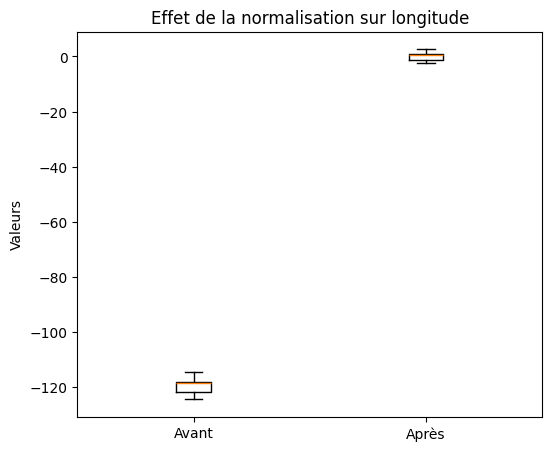

In [ ]:
# === Chargement des données ===
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(df.head())

# === Nettoyage des données ===
print(df.isnull().sum())
df = df.drop_duplicates()

# === Séparation des features et de la cible ===
X = df.drop("median_house_value", axis=1)   # Features
y = df["median_house_value"]                # Cible

# === Imputation des valeurs manquantes ===
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_num = imputer.fit_transform(X)

# === Normalisation des données numériques ===
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# === Séparation en train / validation / test ===
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# === Visualisation AVANT / APRÈS (SANS MATHS) ===

# Choisir automatiquement une feature numérique pour la visualisation
feature_name = X.columns[0]  # ex: longitude
feature_index = X.columns.get_loc(feature_name)

before = X_num[:, feature_index]
after = X_scaled[:, feature_index]

plt.figure(figsize=(6, 5))
plt.boxplot([before, after], labels=["Avant", "Après"])
plt.title("Effet de la normalisation sur " + feature_name)
plt.ylabel("Valeurs")
plt.show()

# **Exercice 2 — Augmentation d’image**

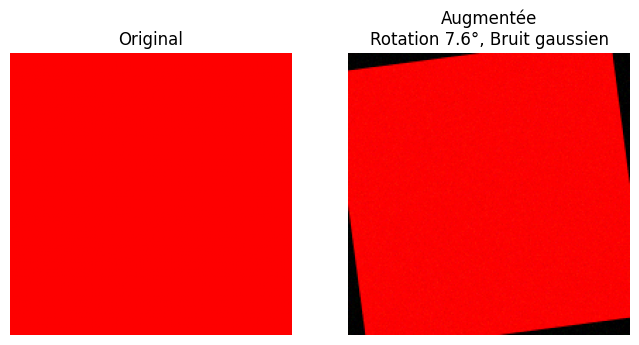

In [ ]:
# === AUGMENTATION D'IMAGES ===


import cv2  # Bibliothèque de vision par ordinateur
import numpy as np  # Opérations numériques
import matplotlib.pyplot as plt  # Visualisation

# === CHARGEMENT ET PRÉTRAITEMENT DE L'IMAGE ===
# Charger l'image depuis le fichier
img = cv2.imread("image.jpg")

# Convertir de BGR (format OpenCV) à RGB (format standard)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normaliser les valeurs de pixels (0-255) en (0-1) pour les calculs
img = img / 255.0

# === FONCTION D'AUGMENTATION D'IMAGE ===
def augment(img):
    """
    Applique plusieurs transformations aléatoires à une image

    Args:
        img: Image numpy array en format RGB normalisée (0-1)

    Returns:
        tuple: (image augmentée, liste des modifications appliquées)
    """
    mods = []  # Liste pour enregistrer les modifications appliquées

    # === FLIP HORIZONTAL ===
    # Retourner l'image horizontalement avec 50% de probabilité
    if np.random.rand() > 0.5:
        img = np.fliplr(img)
        mods.append("Flip horizontal")

    # === ROTATION LÉGÈRE ===
    # Appliquer une rotation aléatoire entre -10° et +10°
    angle = np.random.uniform(-10, 10)  # Angle aléatoire
    h, w, _ = img.shape  # Obtenir les dimensions

    # Créer la matrice de rotation
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)

    # Appliquer la rotation à l'image
    img = cv2.warpAffine(img, M, (w, h))
    mods.append(f"Rotation {angle:.1f}°")

    # === BRUIT GAUSSIEN ===
    # Ajouter du bruit aléatoire pour simuler des conditions réelles
    noise = np.random.normal(0, 0.02, img.shape)  # Bruit gaussien

    # Ajouter le bruit et limiter les valeurs entre 0 et 1
    img = np.clip(img + noise, 0, 1)
    mods.append("Bruit gaussien")

    return img, mods

# === AUGMENTATION ===
# Appliquer les transformations aléatoires
aug_img, modifications = augment(img)

# === VISUALISATION ===
# Créer une figure avec deux sous-graphiques
plt.figure(figsize=(8, 4))

# Sous-graphique 1: Image originale
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

# Sous-graphique 2: Image augmentée
plt.subplot(1, 2, 2)
plt.imshow(aug_img)
plt.title("Augmentée\n" + ", ".join(modifications))
plt.axis("off")

# Afficher la figure
plt.show()


# **Exercice 3 — Image + segmentation**

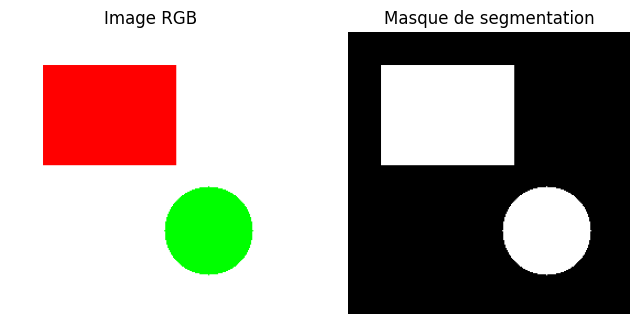

In [ ]:
# === SEGMENTATION D'IMAGE ===
# Ce script crée une image avec des formes géométriques et génère un masque de segmentation

import cv2  # Bibliothèque de vision par ordinateur
import numpy as np  # Opérations numériques
import matplotlib.pyplot as plt  # Visualisation

# === CRÉATION DE L'IMAGE ===
# Créer une image blanche de 256x256 pixels en RGB
img = np.ones((256, 256, 3), dtype=np.uint8) * 255

# === DESSINER DES FORMES ===
# Dessiner un rectangle bleu (BGR: 255,0,0 = bleu)
# Paramètres: image, point haut-gauche, point bas-droit, couleur BGR, -1 = rempli
cv2.rectangle(img, (30, 30), (150, 120), (255, 0, 0), -1)

# Dessiner un cercle vert (BGR: 0,255,0 = vert)
# Paramètres: image, centre, rayon, couleur BGR, -1 = rempli
cv2.circle(img, (180, 180), 40, (0, 255, 0), -1)

# === CRÉATION DU MASQUE DE SEGMENTATION ===
# Créer un masque noir (tous les pixels à 0)
mask = np.zeros((256, 256), dtype=np.uint8)

# Marquer le rectangle sur le masque (valeur 1 = objet)
cv2.rectangle(mask, (30, 30), (150, 120), 1, -1)

# Marquer le cercle sur le masque (valeur 1 = objet)
cv2.circle(mask, (180, 180), 40, 1, -1)

# === VISUALISATION ===
# Créer une figure avec deux sous-graphiques
plt.figure(figsize=(8, 4))

# Sous-graphique 1: Image originale
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image RGB")
plt.axis("off")

# Sous-graphique 2: Masque de segmentation
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Masque de segmentation")
plt.axis("off")

# Afficher la figure
plt.show()


# Exercice 4- Prédire le prix d’une **maison**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("maison.csv")
print(df.head())

   surface    prix
0      264  426117
1       63  143817
2      227  388124
3      297  477881
4      132  235946


Charger les données

In [ ]:


# Créer des données fictives pour la surface et le prix
surface = np.random.randint(50, 300, 50) # Surface entre 50 et 300 m2
prix = 50000 + surface * 1500 + np.random.randint(-20000, 20000, 50) # Prix basé sur la surface avec un peu de bruit

# Créer un DataFrame
data = pd.DataFrame({
    'surface': surface,
    'prix': prix
})

# Sauvegarder le DataFrame dans un fichier CSV
data.to_csv('maison.csv', index=False)

print("Le fichier 'maison.csv' a été créé avec succès avec les colonnes 'surface' et 'prix'.")
print("Voici un aperçu des données :")
print(data.head())

Le fichier 'maison.csv' a été créé avec succès avec les colonnes 'surface' et 'prix'.
Voici un aperçu des données :
   surface    prix
0      167  310742
1      140  277895
2      171  304420
3      175  324739
4      117  238546


Explorer les données

In [ ]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   surface  50 non-null     int64
 1   prix     50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None
surface    0
prix       0
dtype: int64


Visualiser la relation

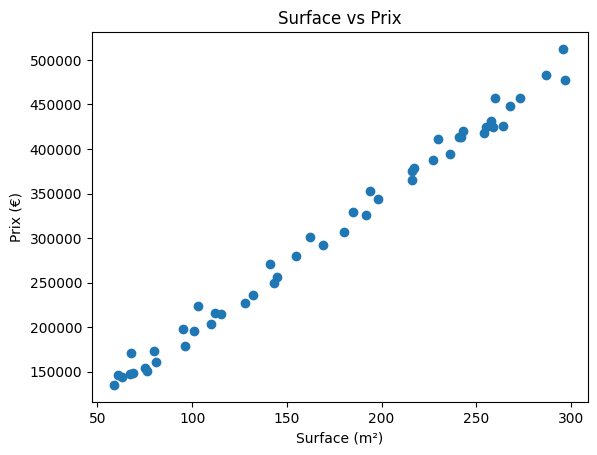

In [ ]:
plt.scatter(df["surface"], df["prix"])
plt.xlabel("Surface (m²)")
plt.ylabel("Prix (€)")
plt.title("Surface vs Prix")
plt.show()


Séparer X et y

In [ ]:
X = df[["surface"]]  # toujours en DataFrame
y = df["prix"]


Séparer les données

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Créer le modèle de régression linéaire

In [ ]:
model = LinearRegression()


Entraîner le modèle

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

Faire des prédictions

In [ ]:
y_pred = model.predict(X_test)


Erreur quadratique moyenne

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)


MSE : 94320901.25833568


Score R² (qualité du modèle)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R² :", r2)


R² : 0.9926935210338131


Visualiser la droite de régression

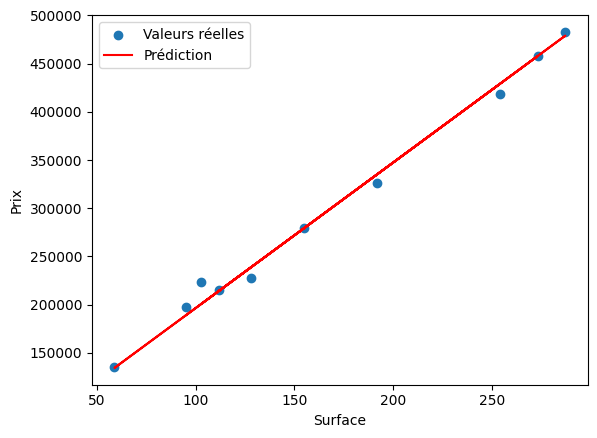

In [ ]:
plt.scatter(X_test, y_test, label="Valeurs réelles")
plt.plot(X_test, y_pred, color="red", label="Prédiction")
plt.xlabel("Surface")
plt.ylabel("Prix")
plt.legend()
plt.show()


In [ ]:
nouvelle_surface = [[90]]
prix_pred = model.predict(nouvelle_surface)

print("Prix estimé :", prix_pred[0], "€")


Prix estimé : 181231.84332905195 €


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Exercice 5 Prédire l’admission selon le score d’examen**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


In [ ]:

# Nombre d'échantillons
n_samples = 100

# Générer des données fictives pour les scores d'examen
np.random.seed(42)
exam_score_1 = np.random.randint(40, 100, n_samples)
exam_score_2 = np.random.randint(30, 95, n_samples)

# Générer l'admission basée sur une combinaison des scores
# Une règle simple: admis si score_1 > 70 ET score_2 > 60, avec un peu de bruit
admitted = ((exam_score_1 > 70) & (exam_score_2 > 60)).astype(int)
# Ajouter un peu de 'bruit' pour rendre les données moins parfaites
admitted = np.where(np.random.rand(n_samples) < 0.1, 1 - admitted, admitted) # 10% de chances d'inverser l'admission

# Créer un DataFrame
data_examen = pd.DataFrame({
    'Exam_Score_1': exam_score_1,
    'Exam_Score_2': exam_score_2,
    'Admitted': admitted
})

# Sauvegarder le DataFrame dans un fichier CSV
data_examen.to_csv('score_examen.csv', index=False)

print("Le fichier 'score_examen.csv' a été créé avec succès.")
print("Voici un aperçu des données :")
print(data_examen.head())

Le fichier 'score_examen.csv' a été créé avec succès.
Voici un aperçu des données :
   Exam_Score_1  Exam_Score_2  Admitted
0            78            91         1
1            91            69         0
2            68            82         0
3            54            53         0
4            82            55         0


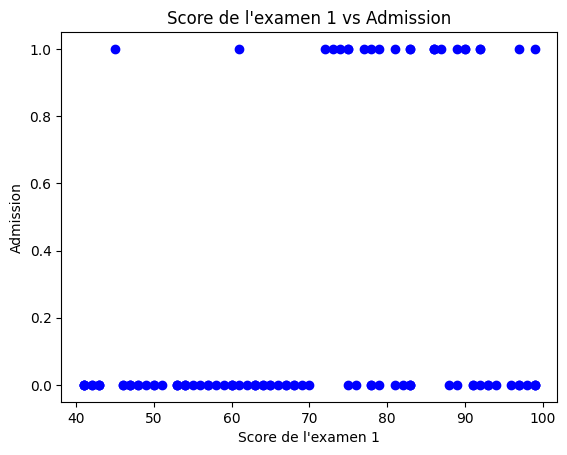

In [ ]:
plt.scatter(df["Exam_Score_1"], df["Admitted"], color="blue") # Utilisation de 'Exam_Score_1' et 'Admitted'
plt.xlabel("Score de l'examen 1") # Mise à jour du label de l'axe X
plt.ylabel("Admission")
plt.title("Score de l'examen 1 vs Admission") # Mise à jour du titre
plt.show()

In [ ]:
X = df[["Exam_Score_1"]]  # Utiliser une feature existante, par exemple 'Exam_Score_1'
y = df["Admitted"] # Utiliser la cible existante 'Admitted'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probabilité d'admission


In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy :", acc)


Accuracy : 0.65


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)


Matrice de confusion :
 [[13  0]
 [ 7  0]]


In [ ]:
auc = roc_auc_score(y_test, y_prob)
print("AUC :", auc)


AUC : 0.7802197802197801


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


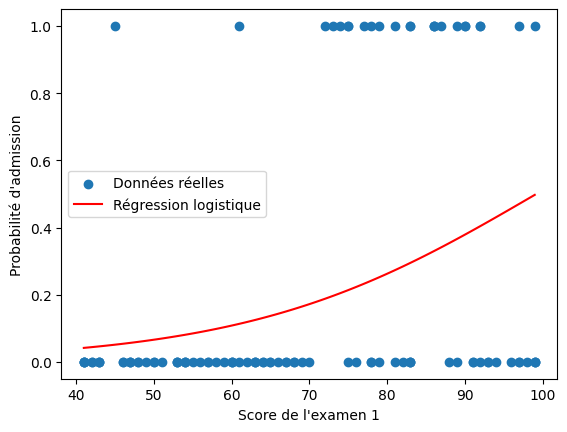

In [ ]:
X_range = np.linspace(df["Exam_Score_1"].min(), df["Exam_Score_1"].max(), 100).reshape(-1, 1)
y_range = model.predict_proba(X_range)[:, 1]

plt.scatter(df["Exam_Score_1"], df["Admitted"], label="Données réelles")
plt.plot(X_range, y_range, color="red", label="Régression logistique")
plt.xlabel("Score de l'examen 1")
plt.ylabel("Probabilité d'admission")
plt.legend()
plt.show()

In [ ]:
nouveau_score = [[68]]
prob_admission = model.predict_proba(nouveau_score)[:, 1]
prediction = model.predict(nouveau_score)

print("Probabilité d'admission :", prob_admission[0])
print("Admis ?" , "Oui" if prediction[0] == 1 else "Non")


Probabilité d'admission : 0.15712114463112195
Admis ? Non


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Exercice 6- Classification avec KNN**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Charger le dataset Iris
iris = load_iris()
X = iris.data          # les features : longueur/largeur pétale/sépale
y = iris.target        # la classe : 0, 1 ou 2 (type de fleur)

# Mettre dans un DataFrame pour visualiser
df = pd.DataFrame(X, columns=iris.feature_names)
df['classe'] = y
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   classe  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
from sklearn.model_selection import train_test_split

# Divise les données en ensembles d'entraînement et de test pour évaluer le modèle
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardiser les features pour que le modèle KNN fonctionne mieux (mise à l'échelle des données)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Créer le modèle
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)
print("Prédictions :", y_pred)
print("Valeurs réelles :", y_test)

Prédictions : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Valeurs réelles : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)


Accuracy : 1.0
Matrice de confusion :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# **Exercice 7-Classification avec SVC**

On va créer un jeu de données artificiel avec 2 classes (parfait pour visualiser)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


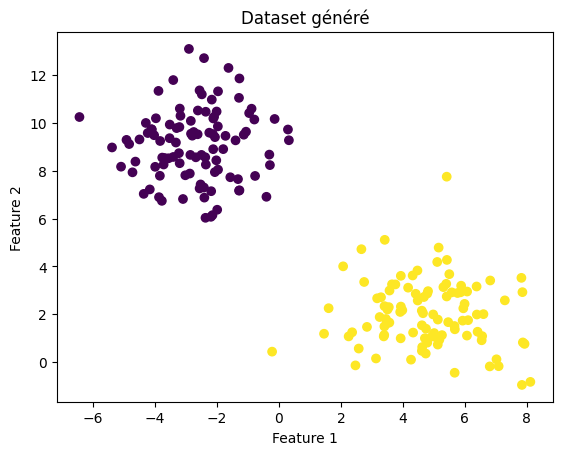

In [ ]:
# Génération du dataset
X, y = make_blobs(
    n_samples=200,
    centers=2,
    random_state=42,
    cluster_std=1.5
)

# Visualisation du dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset généré")
plt.show()


SVM est sensible à l’échelle, donc on normalise

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Séparation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Entraîner un modèle SVC

In [ ]:
from sklearn.svm import SVC # Importation du classifieur Support Vector Classifier


# Création du modèle SVC (avec un noyau RBF pour des frontières de décision courbes)
model = SVC(kernel='rbf', C=1) # Modifié: kernel='linear' -> kernel='rbf'

# Entraînement du modèle sur les données normalisées d'entraînement
model.fit(X_train_scaled, y_train)

SVC(C=1)

In [ ]:
# Prédictions sur le jeu de test
y_pred = model.predict(X_test_scaled)

print("Prédictions :", y_pred[:10])
print("Vraies classes :", y_test[:10])


Prédictions : [0 0 0 0 0 1 0 1 0 1]
Vraies classes : [0 0 0 0 0 1 0 1 0 1]


Évaluer le modèle

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)


Accuracy : 1.0


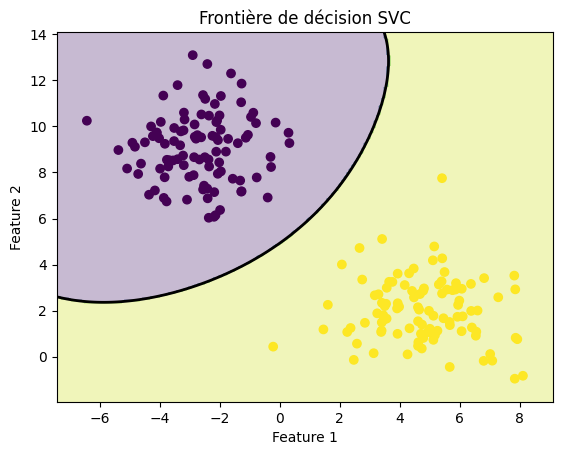

In [ ]:
def plot_decision_boundary(model, X, y):
    # Définir les limites de l'espace de données pour le graphique
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Créer une grille de points sur tout l'espace des features
    # Ces points serviront à évaluer le modèle et dessiner la frontière de décision
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200), # 200 points entre x_min et x_max pour l'axe x
        np.linspace(y_min, y_max, 200)  # 200 points entre y_min et y_max pour l'axe y
    )

    # Aplatir la grille et la transformer (normaliser) comme les données d'entraînement
    grid = np.c_[xx.ravel(), yy.ravel()] # Combiner les coordonnées x et y en paires
    grid = scaler.transform(grid)       # Appliquer la même normalisation que sur les données

    # Prédire la classe pour chaque point de la grille
    Z = model.predict(grid)             # Chaque point de la grille est classifié par le modèle
    Z = Z.reshape(xx.shape)             # Remettre les prédictions dans la forme de la grille (2D)

    # Pour les SVM linéaires, on peut aussi obtenir la distance signée à la frontière de décision
    Z_df = model.decision_function(grid).reshape(xx.shape)

    # Dessiner les régions de décision (zones colorées) et les points de données réels
    plt.contourf(xx, yy, Z, alpha=0.3)  # Remplir les contours avec des couleurs transparentes pour les classes

    # Dessiner la frontière de décision comme une ligne (là où decision_function est 0)
    plt.contour(xx, yy, Z_df, levels=[0], colors='k', linestyles='-', linewidths=2) # Ajout de la ligne de décision

    plt.scatter(X[:, 0], X[:, 1], c=y)  # Afficher les points de données originaux, colorés par leur vraie classe
    plt.xlabel("Feature 1")             # Nom de l'axe x
    plt.ylabel("Feature 2")             # Nom de l'axe y
    plt.title("Frontière de décision SVC") # Titre du graphique
    plt.show()                          # Afficher le graphique

# Appeler la fonction pour visualiser la frontière de décision du modèle SVC
plot_decision_boundary(model, X, y)

# **Jour 2**

# **Exercice 1 -**

ÉTAPE 1 -


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [ ]:
#Fixer la graine aléatoire
np.random.seed(42)


In [ ]:
#On utilise make_blobs, parfait pour créer des données bien séparées

X, y = make_blobs(
    n_samples=200,        # nombre total d'échantillons
    n_features=2,         # 2 variables explicatives
    centers=2,            # 2 classes
    cluster_std=1.0,      # dispersion (plus petit = mieux séparé)
    random_state=42       # reproductibilité
)


In [ ]:
#Vérifier les dimensions

print("Shape de X :", X.shape)
print("Shape de y :", y.shape)


Shape de X : (200, 2)
Shape de y : (200,)


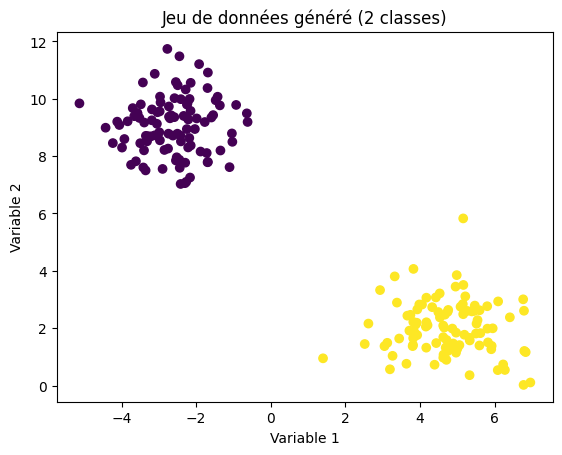

In [ ]:
#Visualiser les données

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.title("Jeu de données généré (2 classes)")
plt.show()


# **ÉTAPE 2 - Séparation des données**

In [ ]:
#Importer la fonction de séparation
from sklearn.model_selection import train_test_split


In [ ]:
#Diviser le jeu de données

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,      # 30 % pour le test
    random_state=42,     # reproductibilité
    stratify=y           # conserve la proportion des classes
)


In [ ]:
#Vérifier les tailles
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)


X_train : (140, 2)
X_test  : (60, 2)
y_train : (140,)
y_test  : (60,)


# **ÉTAPE 3 — Modélisation : Naive Bayes Gaussien**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)


GaussianNB()

# **Évaluation du modèle**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classes réelles :", y_test[:10])
print("Classes prédites :", y_pred[:10])


Classes réelles : [1 0 1 1 1 1 0 1 0 1]
Classes prédites : [1 0 1 1 1 1 0 1 0 1]


In [ ]:
from sklearn.metrics import accuracy_score


# **Exercice 2-Construire le jeu de données météorologiques**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#Créer le dataset

data = {
    "temperature": [5, 8, 10, 12, 15, 18, 20, 22, 25, 28,
                    3, 6, 9, 14, 17, 19, 21, 24, 26, 30],
    "pluie":       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                     1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    "vent":        [30, 25, 20, 15, 10, 12, 8, 7, 5, 3,
                     35, 28, 22, 15, 12, 10, 8, 6, 4, 2],
    "soleil":      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                     0, 1, 2, 4, 5, 6, 7, 8, 9, 10],
    "vetement":    [2, 2, 1, 1, 1, 0, 0, 0, 0, 0,
                     2, 2, 2, 1, 1, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)
df


,temperature,pluie,vent,soleil,vetement
0,5,1,30,1,2
1,8,1,25,2,2
2,10,0,20,3,1
3,12,0,15,4,1
4,15,0,10,5,1
5,18,0,12,6,0
6,20,0,8,7,0
7,22,0,7,8,0
8,25,0,5,9,0
9,28,0,3,10,0


In [ ]:
#Séparer X et y

X = df.drop("veSéparer X et ytement", axis=1)
y = df["vetement"]


In [ ]:
#Vérification

print(X.head())
print(y.head())


   temperature  pluie  vent  soleil
0            5      1    30       1
1            8      1    25       2
2           10      0    20       3
3           12      0    15       4
4           15      0    10       5
0    2
1    2
2    1
3    1
4    1
Name: vetement, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

#Séparation Train / Test (70 % / 30 %)

#On conserve la proportion des classes avec stratify=y

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)


In [ ]:
#Vérifier les tailles

print(X_train.shape)
print(X_test.shape)


(14, 4)
(6, 4)


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
#prédiction

y_pred = model.predict(X_test)


In [ ]:
#Accurency

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle : {accuracy:.2f}")


Accuracy du modèle : 0.83


In [ ]:
jours_fictifs = pd.DataFrame({
    "temperature": [7, 16, 27],
    "pluie": [1, 0, 0],
    "vent": [20, 10, 5],
    "soleil": [2, 6, 9]
})


In [ ]:
predictions = model.predict(jours_fictifs)

for i, p in enumerate(predictions):
    print(f"Jour {i+1} → vêtement prédit : {p}")


Jour 1 → vêtement prédit : 2
Jour 2 → vêtement prédit : 1
Jour 3 → vêtement prédit : 0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


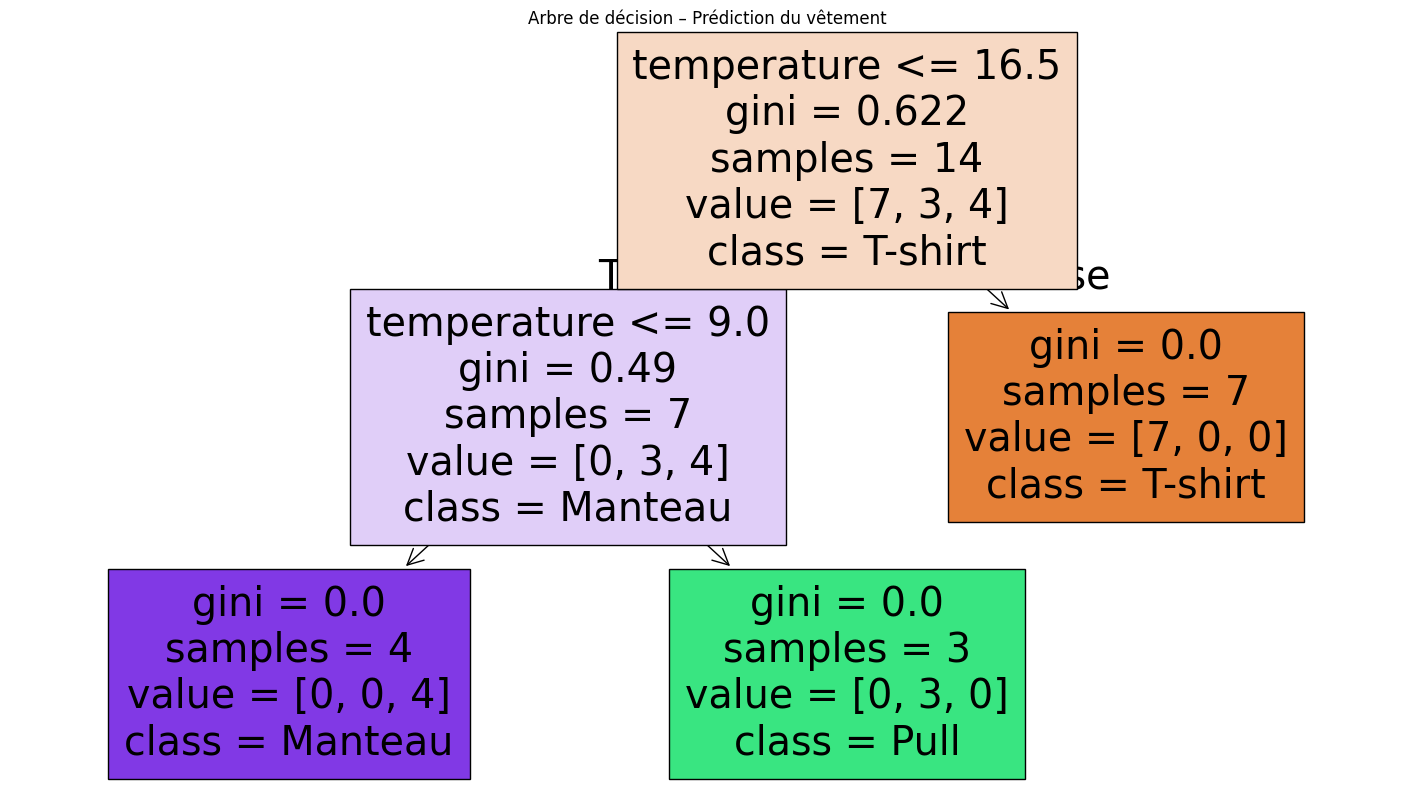

In [ ]:
plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["T-shirt", "Pull", "Manteau"],
    filled=True
)
plt.title("Arbre de décision – Prédiction du vêtement")
plt.show()


# **jeu de données 2D non linéaire**

In [18]:
#Générer un jeu de données non linéaire

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(
    n_samples=300,
    noise=0.25,
    random_state=42
)



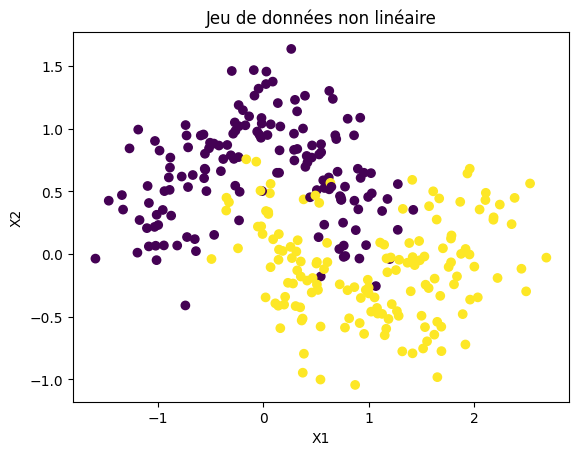

In [19]:
#Visualisation rapide des données

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Jeu de données non linéaire")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [20]:
#Séparation Train / Test (70 % / 30 %)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [21]:
#Choisir et entraîner les algorithmes

#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [23]:
#XGBoost

try:
    from xgboost import XGBClassifier

    xgb = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )

    xgb.fit(X_train, y_train)
    xgb_available = True

except ImportError:
    print("XGBoost non installé")
    xgb_available = False


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:07:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
#Évaluation (Accuracy)

from sklearn.metrics import accuracy_score

models = {
    "Random Forest": rf,
    "Gradient Boosting": gb
}

if xgb_available:
    models["XGBoost"] = xgb


In [25]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy : {acc:.2f}")


Random Forest - Accuracy : 0.91
Gradient Boosting - Accuracy : 0.90
XGBoost - Accuracy : 0.92


In [26]:
#grille permet de tracer les frontières de décision.

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]


In [27]:
#Fonction pour tracer les frontières de décision

def plot_decision_boundary(model, title):
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label="Train")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label="Test")
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()


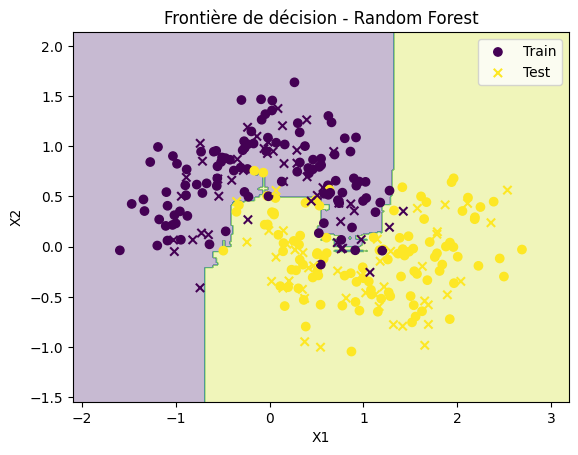

In [28]:
#Tracer les résultats pour chaque modèle

#Random Forest

plot_decision_boundary(rf, "Frontière de décision - Random Forest")



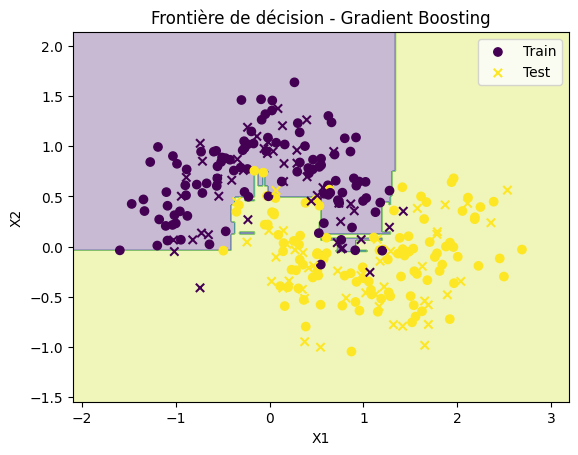

In [29]:
#Gradient Boosting

plot_decision_boundary(gb, "Frontière de décision - Gradient Boosting")


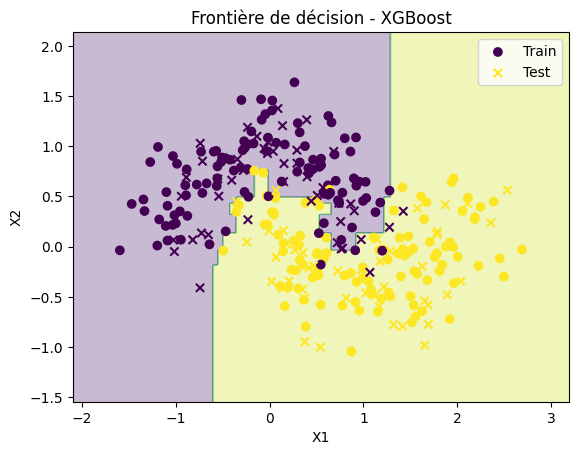

In [30]:
#XGBoost

if xgb_available:
    plot_decision_boundary(xgb, "Frontière de décision - XGBoost")

# **Générer un jeu de données artificiel**

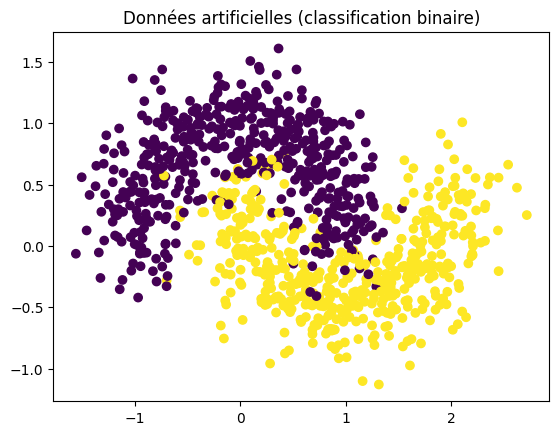

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Générer les données
X, y = make_moons(
    n_samples=1000,
    noise=0.25,
    random_state=42
)

# Visualisation des données
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Données artificielles (classification binaire)")
plt.show()

In [37]:
#Séparer Train / Validation / Test

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)


In [38]:
#Séparation Validation / Test

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)


In [39]:
#Importer le scaler

from sklearn.preprocessing import StandardScaler


In [40]:
#Apprendre la normalisation sur le train

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [41]:
#Appliquer aux autres ensembles

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# **Construire un réseau de neurones profond**

In [45]:
#Importer Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [46]:
#Définir l’architecture

model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [47]:
#Compiler le modèle

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# **Entraîner le modèle et observer les performances**

In [48]:
#Entraînement

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7738 - loss: 0.6204 - val_accuracy: 0.8600 - val_loss: 0.5169
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8553 - loss: 0.5028 - val_accuracy: 0.8933 - val_loss: 0.3985
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8430 - loss: 0.4218 - val_accuracy: 0.8867 - val_loss: 0.3220
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8622 - loss: 0.3461 - val_accuracy: 0.8933 - val_loss: 0.2875
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8430 - loss: 0.3477 - val_accuracy: 0.8933 - val_loss: 0.2744
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8718 - loss: 0.3117 - val_accuracy: 0.8933 - val_loss: 0.2687
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8533 - loss: 0.3043 - val_accuracy: 0.8933 - val_loss: 0.2640
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8645 - loss: 0.2885 - val_accuracy: 0.8933 - val_loss

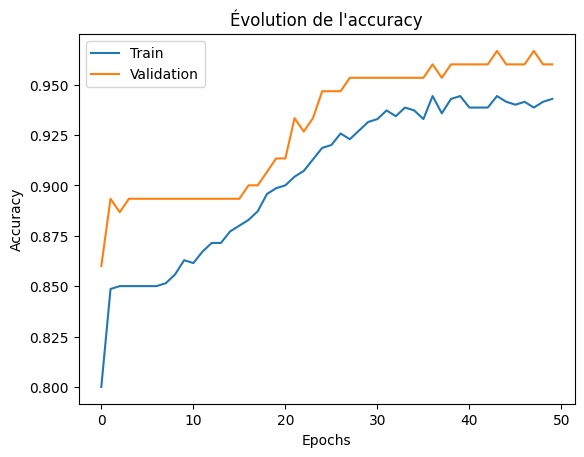

In [49]:
#Visualiser l’évolution des performances

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Évolution de l'accuracy")
plt.show()


In [50]:
#Évaluer le modèle final sur le jeu de test

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Accuracy sur le jeu de test : {test_accuracy:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9637 - loss: 0.1367 
Accuracy sur le jeu de test : 0.97


# **ÉVALUATION ET COMPARAISON DES MODÈLES**

In [55]:
# Importer les fonctions nécessaires pour évaluer les performances des modèles de classification
from sklearn.metrics import (
    accuracy_score,           # Pour calculer la précision
    classification_report,    # Pour obtenir un rapport détaillé (précision, rappel, F1-score)
    confusion_matrix          # Pour construire la matrice de confusion
)

In [53]:
for name, model in models.items():
    print("===================================")
    print(f"Modèle : {name}")

    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {acc:.2f}")

    # Precision / Recall / F1-score
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    print("Matrice de confusion :")
    print(cm)


Modèle : Random Forest
Accuracy : 0.97

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.96      0.97      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Matrice de confusion :
[[72  3]
 [ 2 73]]
Modèle : Gradient Boosting
Accuracy : 0.93

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        75
           1       0.90      0.97      0.94        75

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150

Matrice de confusion :
[[67  8]
 [ 2 73]]
Modèle : XGBoost
Accuracy : 0.96

Rapport de classification :
              precision    recall  f1-score   support

     

In [56]:
for name, model in models.items():
    # Calculer la précision sur les données d'entraînement
    train_acc = accuracy_score(y_train, model.predict(X_train))
    # Calculer la précision sur les données de test
    test_acc = accuracy_score(y_test, model.predict(X_test))

    # Afficher le nom du modèle et ses précisions
    print(f"{name}")
    print(f"Accuracy train : {train_acc:.2f}")
    print(f"Accuracy test  : {test_acc:.2f}")
    print("---------------------------")

Random Forest
Accuracy train : 0.92
Accuracy test  : 0.97
---------------------------
Gradient Boosting
Accuracy train : 0.90
Accuracy test  : 0.93
---------------------------
XGBoost
Accuracy train : 0.92
Accuracy test  : 0.96
---------------------------
